### 데이터 로드 및 전처리

In [27]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [28]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [29]:
import numpy as np

# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = np.mean(X_train)
X_train = X_train - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = np.std(X_train)
X_train = X_train / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
X_test = (X_test - mean) / std

### 모델 구성 및 컴파일

In [30]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1),
])

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])

### 모델 학습

In [31]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=60, batch_size=64)

Epoch 1/60
5/5 [==============================] - 0s 28ms/step - loss: 545.8683 - mae: 21.6811 - val_loss: 623.7001 - val_mae: 22.7893
Epoch 2/60
5/5 [==============================] - 0s 6ms/step - loss: 519.2188 - mae: 21.0291 - val_loss: 596.2010 - val_mae: 22.1428
Epoch 3/60
5/5 [==============================] - 0s 6ms/step - loss: 492.8877 - mae: 20.3642 - val_loss: 565.0675 - val_mae: 21.3981
Epoch 4/60
5/5 [==============================] - 0s 6ms/step - loss: 463.4098 - mae: 19.5849 - val_loss: 529.7253 - val_mae: 20.5193
Epoch 5/60
5/5 [==============================] - 0s 6ms/step - loss: 428.9951 - mae: 18.6500 - val_loss: 487.6029 - val_mae: 19.4291
Epoch 6/60
5/5 [==============================] - 0s 6ms/step - loss: 387.4056 - mae: 17.4742 - val_loss: 436.3705 - val_mae: 18.0295
Epoch 7/60
5/5 [==============================] - 0s 6ms/step - loss: 338.2868 - mae: 15.9911 - val_loss: 376.7708 - val_mae: 16.2649
Epoch 8/60
5/5 [==============================] - 0s 6ms/step

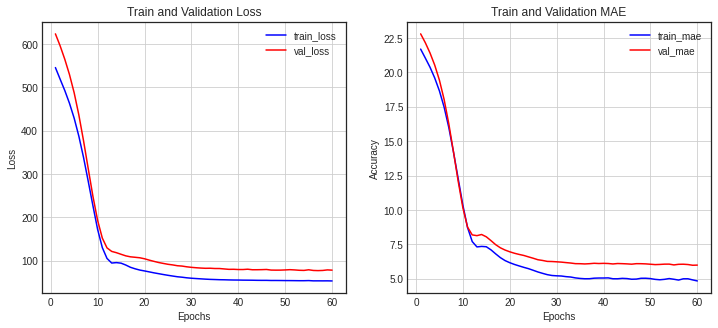

In [32]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [33]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 58.0212 - mae: 5.5824


[58.02119064331055, 5.582393646240234]